In [1]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split , cross_val_score , KFold
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
#IMPLEMENTING KNN ALGORITHM AVAILABLE IN SKLEARN

dataset = datasets.load_breast_cancer()
X_train  , X_test , Y_train , Y_test = train_test_split(dataset.data , dataset.target , random_state = 12244)

In [3]:
clf = KNeighborsClassifier()
clf.fit(X_train , Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [4]:
#accuracy of inbuilt algo
clf.score(X_test , Y_test)

0.916083916083916

In [5]:
# FINDING THE BEST VALUE FOR K
cross_val_score(clf , X_train , Y_train , cv = KFold(5, shuffle = True , random_state = 12224))

array([0.93023256, 0.90588235, 0.95294118, 0.96470588, 0.90588235])

In [6]:
# appending values after cross validation
X_axis = []
Y_axis = []
for i in range(1, 26 , 2):
    clf = KNeighborsClassifier(n_neighbors = i)
    scr = cross_val_score(clf , X_train , Y_train , cv = KFold(random_state = 12244))
    X_axis.append(i)
    Y_axis.append(scr.mean())

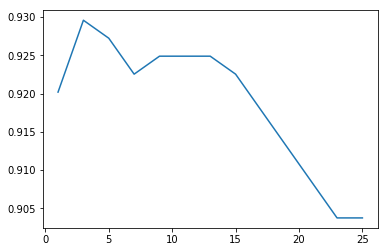

In [10]:
#graphing to determine more losely the optimal value for K
import matplotlib.pyplot as plt
plt.plot(X_axis , Y_axis)
plt.show()
#optimal value seems to be 3

In [8]:
#KNN FROM SCRATCH

def train(X_train , Y_train):
    return

# PREDICT FUNCTION FOR SINGLE POINT
def predict_for_one_point(x_train , y_train , x_test , k):
    distances = []
    for i in range(len(x_train)):
        distance = ((x_train[i, :] - x_test)**2).sum()
        distances.append([distance , i])
    distances = sorted(distances)
    targets = []
    for i in range(k):
        index_of_training_data = distances[i][1]
        targets.append(y_train[index_of_training_data])
    return Counter(targets).most_common(1)[0][0]

#THE PREDICT FUNCTION

def predict(x_train , y_train , x_test , k):
    pred = []
    for x in x_test:
        pred.append(predict_for_one_point(x_train , y_train , x , k))
    return pred

In [9]:
# FINDING ACCURACY
Y_pred = predict(X_train , Y_train , X_test , 3)
#accuracy of our algo
accuracy_score(Y_pred , Y_test)

0.9020979020979021